## Problem 1: Diffusion Models (5 pts)

Consider a diffusion model defined by the forward SDE
$$
\mathrm d X_t = -\tfrac12 \beta(t)\, X_t\,\mathrm dt + \sqrt{\beta(t)}\,\mathrm d W_t, \qquad t\in[0,T].
$$

The corresponding reverse-time SDE, using a learned score function $\( $s_\theta(x,t) \approx \nabla_x \log p_t(x)$, is given by
$$
\mathrm d X_t = \big[ -\tfrac12 \beta(t)\, X_t - \beta(t)\, s_\theta(X_t,t) \big]\mathrm dt + \sqrt{\beta(t)}\,\mathrm d \bar W_t,
$$
where $\bar W_t$ denotes a standard Brownian motion in reverse time.

- (2 pts) Assume the score function is exact, i.e. $s_\theta(x,t) = \nabla_x \log p_t(x)$. Prove that the solution of the ODE
$$
\frac{\mathrm d x_t}{\mathrm d t} = -\tfrac12 \beta(t)\, x_t - \tfrac12 \beta(t)\, s_\theta(x_t,t).
$$
and the reverse-time SDE share the same marginal distribution $p_t(x)$ for all $t \in [0,T]$.

- (3 pts) Use the **integrating factor method** to analytically handle the linear term $-\tfrac12 \beta(t)\, x_t $ in the above ODE, and then apply **forward Euler discretization** to the remaining nonlinear term to derive an explicit one-step update formula for $x_{t+h}$ in terms of $x_t$.


## Problem 2: Policy Improvement in Value Iteration and Policy Iteration (3 pts)

- [2 pts] Prove that the policy improvement step in in **Policy iteration** guarantees a monotonic improvement in the value function,  i.e.,

$$
V^{\pi_{k+1}}(s) \ge V^{\pi_k}(s), \quad \forall s \in \mathcal{S}
$$
  
- [3 pts] Let $\pi_k$ be the greedy policy extracted from the $k$-th iteration of the **value iteration** algorithm, i.e.,
$$
\pi_k(s) = \arg\max_a \sum_{s'} P(s',r \mid s, a)\left[ r(s, a, s') + \gamma V_k(s') \right].
$$
Let $\pi_{k+1}$ be the policy extracted from the $(k+1)$-th value iteration step.
Is it still true that the value function improves under the new policy, i.e.,
$$
V^{\pi_{k+1}}(s) \ge V^{\pi_k}(s), \quad \forall s \in \mathcal{S}?
$$
Either **prove** the statement or provide a **counterexample** to disprove it.

## Problem 3: Policy Gradient Method (7 pts)

Consider a discounted Markov Decision Process (MDP) $(\mathcal S,\mathcal A,P,r,\gamma)$ with states $s\in\mathcal S$, actions $a\in\mathcal A$, transition kernel $P(s'\mid s,a)$, reward $r(s,a)$ bounded, and discount $\gamma\in(0,1)$. Let $\pi_\theta(a\mid s)$ be a differentiable, stochastic policy with parameters $\theta$, and let $s_0$ be a fixed start state. Define the (discounted) return
$$
G_0 \;=\; \sum_{t=0}^{\infty} \gamma^t\, r(s_t,a_t), 
$$
and the performance objective
$$
J(\theta) \;=\; V^{\pi_\theta}(s_0) \;=\; \mathbb E_{\tau\sim \pi_\theta}\big[\,G_0 \,\big],
$$
where a trajectory $\tau=(s_0,a_0,s_1,a_1,\ldots)$ is generated by $s_{t+1}\sim P(\cdot\mid s_t,a_t)$ and $a_t\sim \pi_\theta(\cdot\mid s_t)$.

Denote the value and action-value functions by
$$
V^{\pi}(s)=\mathbb E_\pi\!\left[\sum_{t=0}^{\infty}\gamma^t r(s_t,a_t)\,\Big|\,s_0=s\right], 
\qquad
Q^{\pi}(s,a)=\mathbb E_\pi\!\left[\sum_{t=0}^{\infty}\gamma^t r(s_t,a_t)\,\Big|\,s_0=s, a_0=a\right],
$$
and the advantage by $A^{\pi}(s,a)=Q^{\pi}(s,a)-V^{\pi}(s)$. Let $d^{\pi}(s)$ be the (unnormalized) $\gamma$-discounted state visitation distribution:
$$
d^{\pi}(s) \;=\; \sum_{t=0}^{\infty} \gamma^t\, \Pr(s_t=s \mid \pi).
$$


- (4 pts) Prove the  {Policy Gradient Theorem.} 
$$
\nabla_\theta J(\theta) 
\;=\; \mathbb E_{\pi_\theta}\!\Bigg[\, \sum_{t=0}^{\infty} \gamma^t\, \nabla_\theta \log \pi_\theta(a_t\mid s_t)\, Q^{\pi_\theta}(s_t,a_t) \,\Bigg]
\;=\; \frac{1}{1-\gamma}\,\mathbb E_{s\sim d^{\pi_\theta},\,a\sim \pi_\theta}\!\big[\, \nabla_\theta \log \pi_\theta(a\mid s)\, Q^{\pi_\theta}(s,a) \,\big].
$$

- (3 pts.) Show that for any function $b:\mathcal S\to\mathbb R$,
$$
\mathbb E_{\pi_\theta}\!\Bigg[\sum_{t=0}^{\infty}\gamma^t\, \nabla_\theta \log \pi_\theta(a_t\mid s_t)\, b(s_t)\Bigg] \;=\; 0,
$$
and hence the policy gradient can be equivalently written as
$$
\nabla_\theta J(\theta) 
\;=\; \mathbb E_{\pi_\theta}\!\Bigg[\sum_{t=0}^{\infty}\gamma^t\, \nabla_\theta \log \pi_\theta(a_t\mid s_t)\, \big(Q^{\pi_\theta}(s_t,a_t)-b(s_t)\big)\Bigg].
$$
In the advantage method, how should $b(s)$ be chosen, and what is the benefit of this choice?

## Programming Problem: Comparing SARSA and Q-Learning on 10×10 Gridworld (10 pts)

In this problem, you will implement and compare two temporal-difference reinforcement learning algorithms:

- SARSA (On-policy TD(0))
- Q-Learning (Off-policy TD(0))

You will test them on a 10×10 Gridworld with obstacles and a goal.

---
###  Environment Description

- **Grid size**: 10 × 10 (states indexed by (row, col))
- **Actions**: {up, down, left, right}
- **Transition**: deterministic, constrained by grid boundaries
- **Rewards**:
    - Reaching the **goal state** (red `G`): **+10**, then episode ends
    - Stepping into an **obstacle** (green `O`): **−10**, and the agent remains in the obstacle
    - All other steps: **0**
- **Goal state behavior**:
    - It is **terminal and absorbing**: after entering the goal, any action returns the agent to the goal state with **reward 0**
- **Start state**: always starts at (0, 0)
- **Discount factor**: γ = 0.99

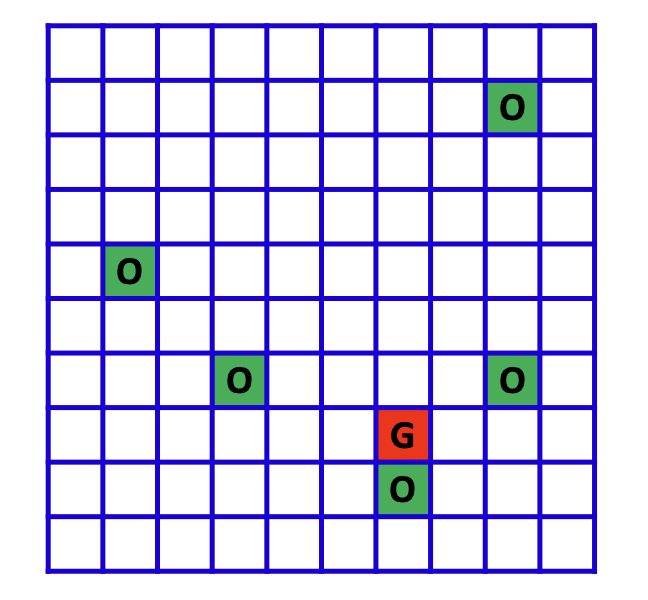
---

### Task : Compare Convergence 

1. Implement **SARSA** and **Q-learning** using an ε-greedy policy with $\epsilon = 0.1$ or $0.5$.
2. Randomly select **10 distinct non-terminal, non-obstacle states** from the grid.
3. During training, track the **value estimate** at each selected state:
   - Define the state value as $V(s) = \max_a Q(s, a)$.
4. For each algorithm, plot the **sum of the values** at the 10 selected states over episodes and compare the convergence rate. 